### web scraping

- automated extraction of data from websites
- website content is firstly fetched (usually using HTTP) and then parsed to extract specific information

step 1: fetching content: HTTP requests (urllib, requests, httplib2)

step 2: parsing content: 1) html parsing (BeautifulSoup, RegEx, grep) 2) DOM parsing (Scrapy, Selenium) 3) computer vision
1. HTML parsing: 1) parse HTML and CSS associated with web contents 2) cannot parse dynamic changes made by javascripts 3) work with structured texts, rather than object of the Document-Object-Models
2. DOM parsing: 2) parse dynamic contents in addition to static contents 2) can parse dynamic changes made by code elements 3) can work either with texts or with objects in the DOM

In [13]:
import httplib2
import urllib
import requests

import webbrowser

from pprint import pprint

In [2]:
webbrowser.open('http://www.pluralsight.com')

True

**httplib2**

In [4]:
http = httplib2.Http()

resp, data = http.request('http://www.pluralsight.com')

print(type(resp), type(data))

<class 'httplib2.Response'> <class 'bytes'>


In [5]:
resp

{'date': 'Sun, 15 Nov 2020 02:06:58 GMT',
 'content-type': 'text/html; charset=UTF-8',
 'transfer-encoding': 'chunked',
 'connection': 'keep-alive',
 'set-cookie': '__cfduid=d788cad61229ff9dbf9949994e94924301605406018; expires=Tue, 15-Dec-20 02:06:58 GMT; path=/; domain=.www.pluralsight.com; HttpOnly; SameSite=Lax; Secure, cf-ipcountry=US; path=/; domain=www.pluralsight.com',
 'strict-transport-security': 'max-age=300; includeSubDomains; preload',
 'x-content-type-options': 'nosniff',
 'x-xss-protection': '1',
 'vary': 'Host,CF-IPCountry,Accept-Encoding,User-Agent',
 'last-modified': 'Sun, 15 Nov 2020 02:01:55 GMT',
 'cache-control': 'max-age=900, s-maxage=86400',
 'expires': 'Sun, 15 Nov 2020 02:21:58 GMT',
 'cf-cache-status': 'DYNAMIC',
 'cf-request-id': '066b40e2930000efe9191bb000000001',
 'expect-ct': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"',
 'server': 'cloudflare',
 'cf-ray': '5f256a7dbd63efe9-EWR',
 'status': '200',
 'content-leng

In [14]:
pprint(data)

(b'\n<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta http-equiv="content-type"'
 b' content="text/html; charset=UTF-8" />\n<meta http-equiv="X-UA-Compatible'
 b'" content="IE=edge,chrome=1" />\n<meta content=\'width=device-width, initi'
 b"al-scale=1.0, maximum-scale=1.0, user-scalable=0' name='viewport' />\n<me"
 b'ta name="appRedirectPath" content="/id/dashboard" />\n<meta name="keyword'
 b's" />\n<meta name="description" content="Pluralsight is the technology wo'
 b'rkforce development company that helps teams know more and work better toget'
 b'her with stronger skills, improved processes and informed leaders. " />\n'
 b'<meta property="og:description" content="Pluralsight is the technology workf'
 b'orce development company that helps teams know more and work better together'
 b' with stronger skills, improved processes and informed leaders. " />\n<me'
 b'ta name="twitter:description" content="Pluralsight is the technology workfor'
 b'ce development company that helps teams know 

In [15]:
html = data.decode('UTF-8')

type(html)

<class 'str'>

In [17]:
pprint(html)

('\n'
 '<!DOCTYPE html>\n'
 '<html lang="en">\n'
 '<head>\n'
 '<meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n'
 '<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n'
 "<meta content='width=device-width, initial-scale=1.0, maximum-scale=1.0, "
 "user-scalable=0' name='viewport' />\n"
 '<meta name="appRedirectPath" content="/id/dashboard" />\n'
 '<meta name="keywords" />\n'
 '<meta name="description" content="Pluralsight is the technology workforce '
 'development company that helps teams know more and work better together with '
 'stronger skills, improved processes and informed leaders. " />\n'
 '<meta property="og:description" content="Pluralsight is the technology '
 'workforce development company that helps teams know more and work better '
 'together with stronger skills, improved processes and informed leaders. " '
 '/>\n'
 '<meta name="twitter:description" content="Pluralsight is the technology '
 'workforce development company that helps t

 '<div class="path-courses"><span>11</span> Courses</div>\n'
 '<div class="path-link simple-arrow">Take a look</div>\n'
 '</a>\n'
 '</div>\n'
 '</div>\n'
 '<div class="paths-items">\n'
 '<div class="path-items-container"><a '
 'href="https://www.pluralsight.com/paths/angular-js">\n'
 '<img class="path-icon" '
 'src="https://pluralsight.imgix.net/paths/path-icons/angular-14a0f6532f.png" '
 'alt="Angular Path" />\n'
 '<div class="path-label">Path</div>\n'
 '<div class="path-title">Angular</div>\n'
 '<div class="path-courses"><span>14</span> Courses</div>\n'
 '<div class="path-link simple-arrow">Take a look</div>\n'
 '</a>\n'
 '</div>\n'
 '</div>\n'
 '<div class="paths-items">\n'
 '<div class="path-items-container"><a '
 'href="https://www.pluralsight.com/paths/core-python">\n'
 '<img class="path-icon" '
 'src="https://pluralsight.imgix.net/paths/python-7be70baaac.png" alt="Python '
 'Path" />\n'
 '<div class="path-label">Path</div>\n'
 '<div class="path-title">Core Python</div>\n'
 '<div

**urllib**

google does not allow python libraries to make http requests to its sites

In [21]:
resp = urllib.request.urlopen('https://www.google.com/search?q=pluralsight')

print(resp.info())

HTTPError: HTTP Error 403: Forbidden

In [22]:
req = urllib.request.Request('https://www.google.com/search?q=pluralsight', headers={'User-Agent': 'Magic Browser'})

resp = urllib.request.urlopen(req)

In [24]:
print(type(resp))

print(resp.info())

<class 'http.client.HTTPResponse'>
Content-Type: text/html; charset=ISO-8859-1
Date: Sun, 15 Nov 2020 02:43:02 GMT
Expires: -1
Cache-Control: private, max-age=0
P3P: CP="This is not a P3P policy! See g.co/p3phelp for more info."
Server: gws
X-XSS-Protection: 0
X-Frame-Options: SAMEORIGIN
Set-Cookie: 1P_JAR=2020-11-15-02; expires=Tue, 15-Dec-2020 02:43:02 GMT; path=/; domain=.google.com; Secure
Set-Cookie: CGIC=; expires=Fri, 14-May-2021 02:43:02 GMT; path=/complete/search; domain=.google.com; HttpOnly
Set-Cookie: CGIC=; expires=Fri, 14-May-2021 02:43:02 GMT; path=/search; domain=.google.com; HttpOnly
Set-Cookie: NID=204=a7PEyzuXqZ39AZjtcxrwnS-N7JXwI8oknPd9Zj7zCjnXK0GAGcrVQVFIj3-tcT8jnxIeH9yFEJc7ZCWHZrGhAdffJBc4KMMkiz92BnR31FSiMQsEkOgvY3hC_q6PWHZAU4mzsJu70KkQ-kFk_HTk6R9_MccRNEOD1mhyoM6sjg0; expires=Mon, 17-May-2021 02:43:02 GMT; path=/; domain=.google.com; HttpOnly
Alt-Svc: h3-Q050=":443"; ma=2592000,h3-29=":443"; ma=2592000,h3-T051=":443"; ma=2592000,h3-Q046=":443"; ma=2592000,h3-Q043=

In [26]:
resp.geturl(), resp.getcode()

('https://www.google.com/search?q=pluralsight', 200)

('<!doctype html><html lang="en"><head><meta charset="UTF-8"><meta '
 'content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" '
 'itemprop="image"><title>pluralsight - Google Search</title><script '
 'nonce="A/RZ+m2qc58kbJaenTrm5g==">(function(){\n'
 'document.documentElement.addEventListener("submit",function(b){var '
 'a;if(a=b.target){var '
 'c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else '
 'a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var '
 'a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break '
 'a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){\n'
 'var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var '
 'c=a.timing;if(c){var '
 'd=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break '
 'a}}a.now&&(b.wsrt=
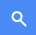
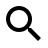
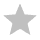
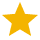
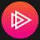
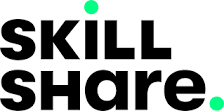

In [27]:
data = resp.read()

html = data.decode('ISO-8859-1')

pprint(html)

**requests**

In [29]:
resp = requests.get('https://www.pluralsight.com/')

type(resp)

<class 'requests.models.Response'>

In [30]:
resp.status_code, resp.url

(200, 'https://www.pluralsight.com/')

In [31]:
data = resp.text

pprint(data)

('\n'
 '<!DOCTYPE html>\n'
 '<html lang="en">\n'
 '<head>\n'
 '<meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n'
 '<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n'
 "<meta content='width=device-width, initial-scale=1.0, maximum-scale=1.0, "
 "user-scalable=0' name='viewport' />\n"
 '<meta name="appRedirectPath" content="/id/dashboard" />\n'
 '<meta name="keywords" />\n'
 '<meta name="description" content="Pluralsight is the technology workforce '
 'development company that helps teams know more and work better together with '
 'stronger skills, improved processes and informed leaders. " />\n'
 '<meta property="og:description" content="Pluralsight is the technology '
 'workforce development company that helps teams know more and work better '
 'together with stronger skills, improved processes and informed leaders. " '
 '/>\n'
 '<meta name="twitter:description" content="Pluralsight is the technology '
 'workforce development company that helps t

 '<div class="flex-open-block section">\n'
 '<a href="https://www.pluralsight.com/product/skills/free">\n'
 '<div class="flex-open-block-wrapper lazy-bg block--transparent '
 'block--left    clearfix">\n'
 '<div class="main clearfix"><div class="image section">\n'
 '<img src="/etc/clientlibs/pluralsight/main/images/px.png" '
 'data-lazysrc="/content/pluralsight/en/jcr:content/main/generic_block_135160/parsys/columns/column-parsys-1/flex_block/parsys/flex_open_block_copy_1875049544/parsys/image/image-res.img.a8fee7f4-c010-46be-9844-5f03dcc59da6.jpg" '
 'alt="50 Free Courses" />\n'
 '</div>\n'
 '<div class="spacer section">\n'
 '<div class="spacer  " style="height:20px"></div>\n'
 '</div>\n'
 '<div class="title2 section">\n'
 '<div data-emptytext="Title">\n'
 '<h6 class="title--yellow         disableBottomMargin">\n'
 'Create your free account\n'
 '</h6>\n'
 '</div></div>\n'
 '<div class="spacer section">\n'
 '<div class="spacer  " style="height:20px"></div>\n'
 '</div>\n'
 '<div class="